<a href="https://colab.research.google.com/github/MarcoLibertini/UPSO/blob/main/ProyectoFinalAMBD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTACION DE LIBRERIAS


In [1]:
import pandas as pd

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

pathCurso = '/content/drive/MyDrive/ProyeFinal/'
ruta_archivo = pathCurso + "megaGymDataset.csv"
dfGym = pd.read_csv(ruta_archivo)
dfGym

,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2913,2913,EZ-bar skullcrusher-,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1,Average
2914,2914,Lying Close-Grip Barbell Triceps Press To Chin,NaN,Strength,Triceps,E-Z Curl Bar,Beginner,8.1,Average
2915,2915,EZ-Bar Skullcrusher - Gethin Variation,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN
2916,2916,TBS Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN


In [35]:
dfGym.describe()

,Unnamed: 0,Rating
count,506.000000,506.000000
mean,1520.446640,7.811660
std,823.836914,2.110896
min,8.000000,0.000000
25%,930.500000,7.900000
50%,1486.500000,8.500000
75%,2129.500000,8.900000
max,2913.000000,9.600000


# EXPLORAR DATOS NULOS

In [3]:
(round(dfGym.isna().sum() * 100 / dfGym.shape[0], 2)).astype(str) + "%"

Unnamed: 0      0.0%
Title           0.0%
Desc          53.12%
Type            0.0%
BodyPart        0.0%
Equipment       0.0%
Level           0.0%
Rating        64.67%
RatingDesc    70.46%
dtype: object

In [4]:
dfGym.isnull().sum()

Unnamed: 0       0
Title            0
Desc          1550
Type             0
BodyPart         0
Equipment        0
Level            0
Rating        1887
RatingDesc    2056
dtype: int64

# VISUALIZACION DE DATOS NULOS (RUIDO)

<Axes: >

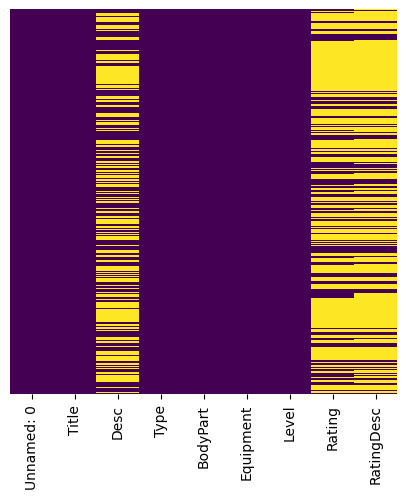

In [5]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(dfGym.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# LIMPIEZA DE DATOS (Eliminaremos CARACTERISTICAS que aportan Ruido)

In [6]:
# Manejar valores nulos
dfGym = dfGym.dropna()  # O utiliza otras estrategias como la imputación


# Crear un nuevo DataFrame sin las columnas "Unnamed: 0" y "Desc",'Rating','RatingDesc'
df_gym_limpio = dfGym.drop(['Unnamed: 0','Desc','Rating','RatingDesc'], axis=1)



df_gym_limpio

,Title,Type,BodyPart,Equipment,Level
8,Barbell roll-out,Strength,Abdominals,Barbell,Intermediate
9,Barbell Ab Rollout - On Knees,Strength,Abdominals,Barbell,Intermediate
10,Decline bar press sit-up,Strength,Abdominals,Barbell,Intermediate
11,Bench barbell roll-out,Strength,Abdominals,Barbell,Beginner
13,Seated bar twist,Strength,Abdominals,Barbell,Intermediate
...,...,...,...,...,...
2888,Bodyweight triceps press,Strength,Triceps,Body Only,Intermediate
2894,Straight-arm plank with kick-back,Strength,Triceps,Body Only,Intermediate
2911,Decline EZ-bar skullcrusher,Strength,Triceps,E-Z Curl Bar,Intermediate
2912,EZ-Bar Skullcrusher,Strength,Triceps,E-Z Curl Bar,Intermediate


# EVALUACION DE DIFERENTES NIVELES DE ENTRENAMIENTO

Intermediate    416
Beginner         83
Expert            7
Name: Level, dtype: int64


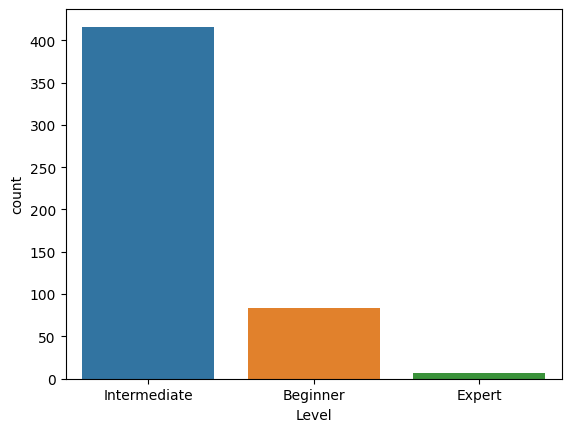

In [7]:
# Análisis de frecuencia de ejercicios por nivel
level_counts = df_gym_limpio['Level'].value_counts()
print(level_counts)



sns.countplot(x='Level', data=df_gym_limpio)
plt.show()

# VISUALIZACION DE CANTIDAD DE 'TIPOS DE ENTRENAMIENTO'

Text(0.5, 0, 'Tipos de ejercicio')

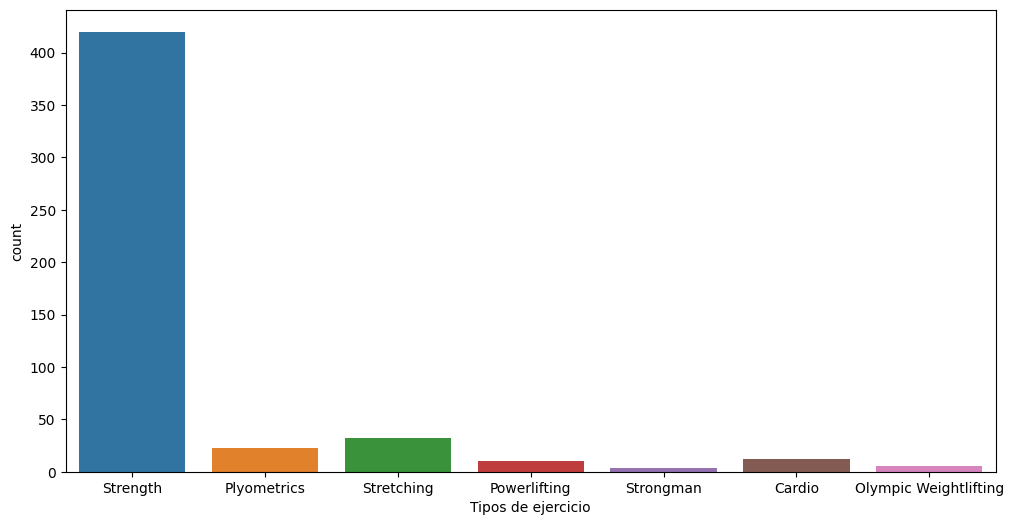

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(x='Type',data=df_gym_limpio)
plt.xlabel("Tipos de ejercicio")

# VISUALIZACION CANTIDADES DE 'PARTES DEL CUERPO'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Abdominals'),
  Text(1, 0, 'Abductors'),
  Text(2, 0, 'Adductors'),
  Text(3, 0, 'Biceps'),
  Text(4, 0, 'Calves'),
  Text(5, 0, 'Chest'),
  Text(6, 0, 'Forearms'),
  Text(7, 0, 'Glutes'),
  Text(8, 0, 'Hamstrings'),
  Text(9, 0, 'Lats'),
  Text(10, 0, 'Lower Back'),
  Text(11, 0, 'Middle Back'),
  Text(12, 0, 'Traps'),
  Text(13, 0, 'Quadriceps'),
  Text(14, 0, 'Shoulders'),
  Text(15, 0, 'Triceps')])

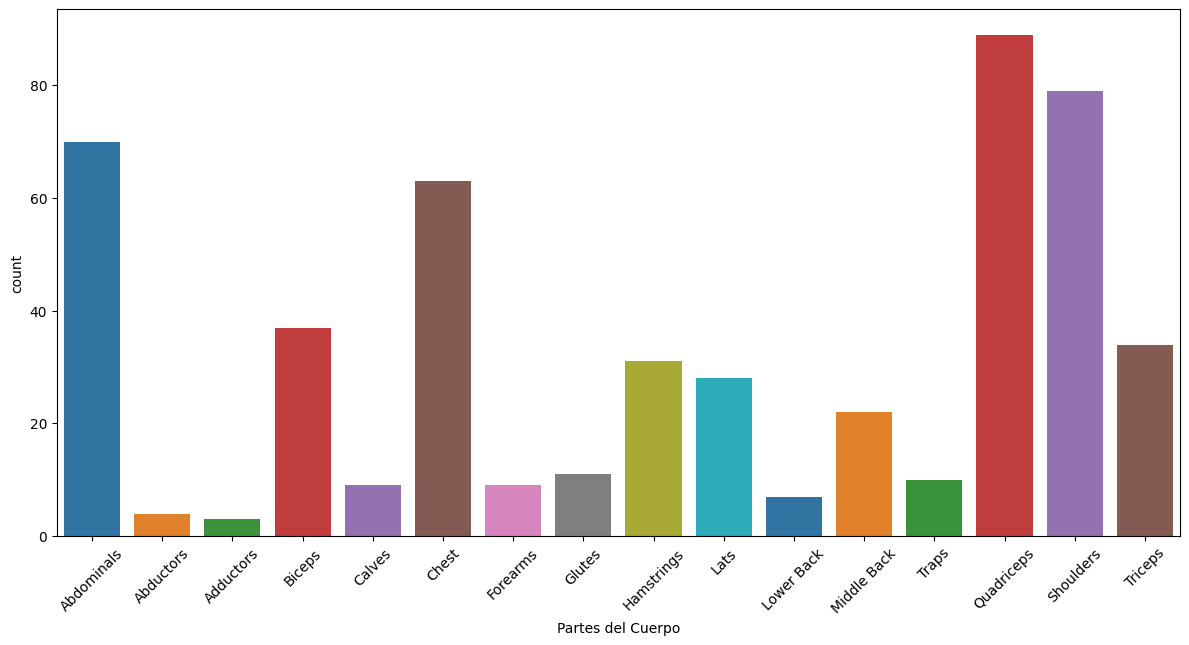

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x='BodyPart',data=df_gym_limpio,palette='tab10')
plt.xlabel("Partes del Cuerpo")
plt.tight_layout()
plt.xticks(rotation=45)

# VISUALIZACION CANTIDADES DE 'EQUIPAMIENTOS'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Barbell'),
  Text(1, 0, 'Kettlebells'),
  Text(2, 0, 'Dumbbell'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Cable'),
  Text(5, 0, 'Machine'),
  Text(6, 0, 'Body Only'),
  Text(7, 0, 'Medicine Ball'),
  Text(8, 0, 'None'),
  Text(9, 0, 'Exercise Ball'),
  Text(10, 0, 'Foam Roll'),
  Text(11, 0, 'E-Z Curl Bar'),
  Text(12, 0, 'Bands')])

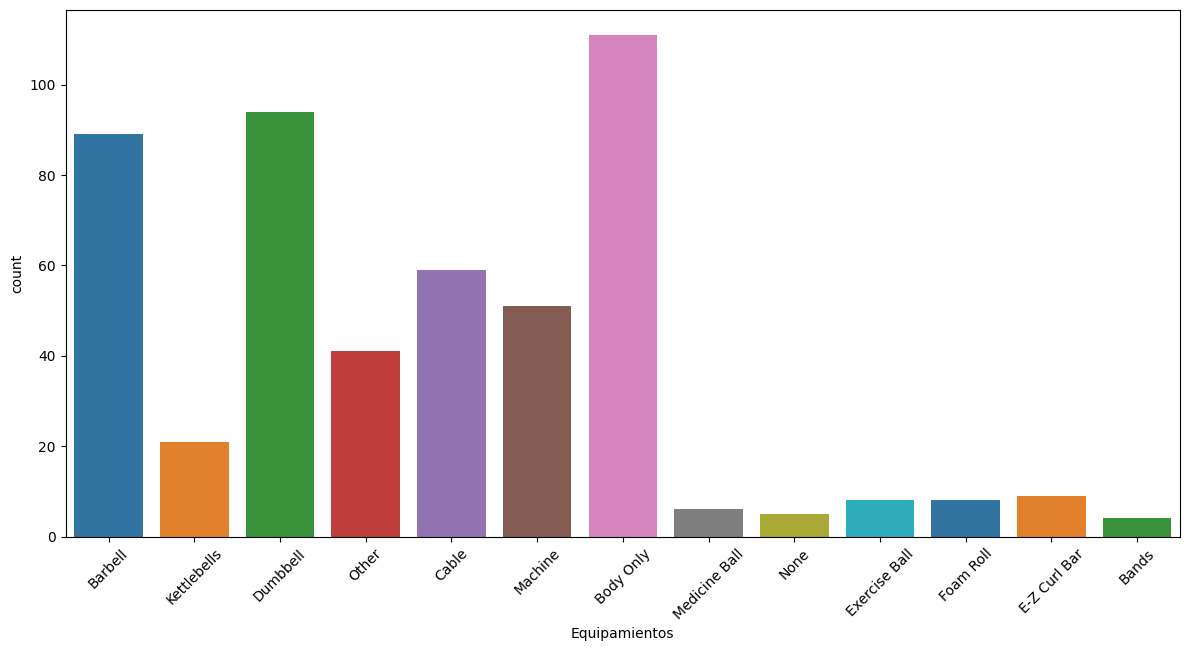

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x='Equipment',data=df_gym_limpio,palette='tab10')
plt.xlabel("Equipamientos")
plt.tight_layout()
plt.xticks(rotation=45)

# SELECTOR DE LEVEL PARA VER SUS EJERCICIOS

Ingrese el nivel de dificultad (Beginner, Intermediate, Expert): Beginner


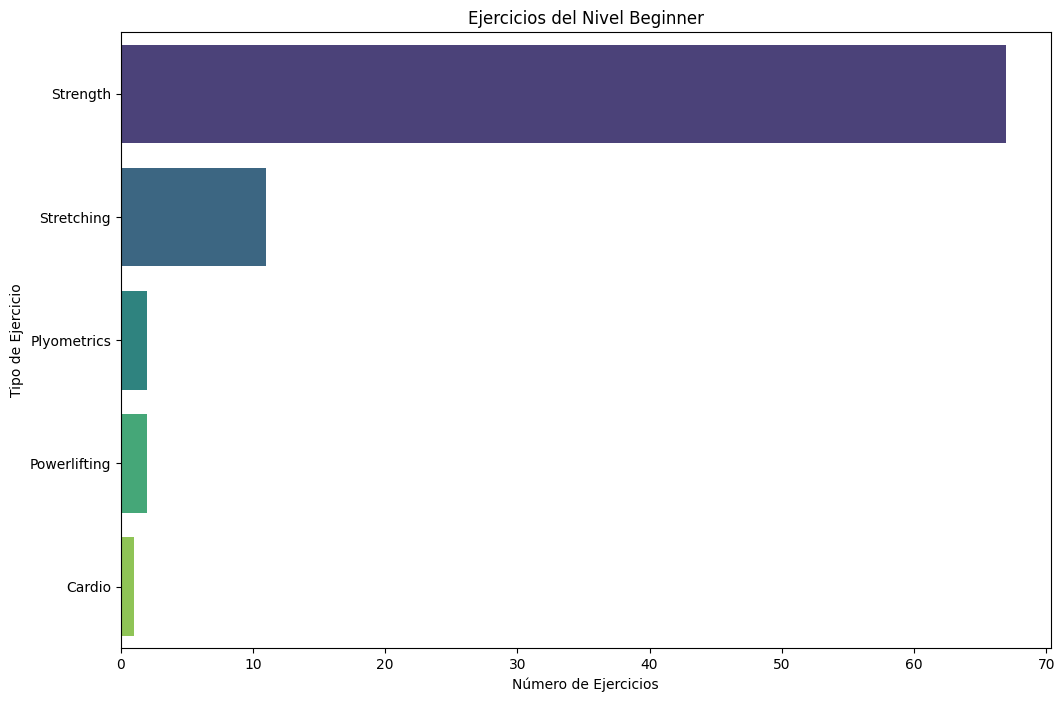

In [11]:
# Solicitar al usuario que ingrese el nivel
nivel_deseado = input("Ingrese el nivel de dificultad (Beginner, Intermediate, Expert): ")

# Filtrar datos para el nivel deseado
ejercicios_nivel = df_gym_limpio[df_gym_limpio['Level'] == nivel_deseado]

# Graficar los ejercicios
plt.figure(figsize=(12, 8))
sns.countplot(y='Type', data=ejercicios_nivel, palette='viridis')
plt.title(f'Ejercicios del Nivel {nivel_deseado}')
plt.xlabel('Número de Ejercicios')
plt.ylabel('Tipo de Ejercicio')
plt.show()


# **EXPLORACION INTERACTIVA**


```
Selecciona NIVEL DE DIFICULTAD
luego TIPO DE ENTRENAMIENTO
Luego muestra los EJERCICIOS, su nombre y su equipamiento a utilizar.
```



In [20]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que ya tienes tu DataFrame df_gym_limpio

# Obtener niveles únicos y tipos de entrenamiento únicos
niveles_unicos = df_gym_limpio['Level'].unique()
tipos_entrenamiento_unicos = df_gym_limpio['Type'].unique()

# Crear widgets para la selección de nivel y tipo de entrenamiento
nivel_widget = widgets.Dropdown(
    options=niveles_unicos,
    value=niveles_unicos[0],
    description='Seleccione el nivel:'
)

tipo_entrenamiento_widget = widgets.Dropdown(
    options=tipos_entrenamiento_unicos,
    value=tipos_entrenamiento_unicos[0],
    description='Seleccione el tipo de entrenamiento:'
)

# Función para actualizar el gráfico según las selecciones del usuario
def update_chart(nivel, tipo_entrenamiento):
    # Filtrar datos para el nivel y tipo de entrenamiento seleccionados
    ejercicios_seleccionados = df_gym_limpio[(df_gym_limpio['Level'] == nivel) & (df_gym_limpio['Type'] == tipo_entrenamiento)]

    # Verificar si hay ejercicios para las selecciones
    if ejercicios_seleccionados.empty:
        print(f"No hay ejercicios para el nivel {nivel} y tipo de entrenamiento {tipo_entrenamiento}. Intente con otras selecciones.")
        return

    # Mostrar los ejercicios y el tipo de equipamiento
    print("\nEjercicios y tipo de equipamiento:")
    print(ejercicios_seleccionados[['Title', 'Equipment']])

    # Graficar los ejercicios por tipo de equipamiento con etiquetas
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Equipment', y='Title', data=ejercicios_seleccionados, hue='Equipment', palette='viridis', s=100)
    plt.title(f'Ejercicios del Tipo {tipo_entrenamiento} para el Nivel {nivel}')
    plt.xlabel('Tipo de Equipamiento')
    plt.ylabel('Nombre del Ejercicio')
    plt.legend(title='Tipo de Equipamiento', bbox_to_anchor=(1, 1))

    # Rotar las etiquetas del eje x verticalmente


    #para girar las etiquetas del eje x
    #plt.xticks(rotation=90)

    plt.show()

# Crear un widget interactivo para la función de actualización
widgets.interactive(update_chart, nivel=nivel_widget, tipo_entrenamiento=tipo_entrenamiento_widget)


interactive(children=(Dropdown(description='Seleccione el nivel:', options=('Intermediate', 'Beginner', 'Exper…

# CONVERSION DE VARIABLES CATEGORICAS CON ONE HOT ENCODER


In [21]:
# Elimina las columnas 'Title', 'Equipment', 'BodyPart', 'Type' y 'Level' del DataFrame new_df y guarda las características en X_
X_ = df_gym_limpio.drop(['Title','Equipment','BodyPart','Type','Level'], axis=1)

# Realiza codificación one-hot de las columnas categóricas 'Title', 'Equipment', 'BodyPart' y 'Type' y guarda el resultado en dms
df_gym_limpio_encoded = pd.get_dummies(df_gym_limpio[['Title','Equipment','BodyPart','Type']])



# PREPARACION DE CONJUNTO DE ENTRENAMIENTO Y TEST

In [22]:
X = pd.concat([X_ , df_gym_limpio_encoded],axis=1)
y = df_gym_limpio['Level']

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.35,random_state=42)

In [15]:
y

8       Intermediate
9       Intermediate
10      Intermediate
11          Beginner
13      Intermediate
            ...     
2888    Intermediate
2894    Intermediate
2911    Intermediate
2912    Intermediate
2913    Intermediate
Name: Level, Length: 506, dtype: object

# ESCALADO DE LOS DATOS


In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **CREACION DE MODELOS Y SUS METRICAS**


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K-Nearest Neighbors:
Confusion Matrix: [[ 0  0 16]
 [ 0  0  1]
 [ 0  0 85]]
Precision: 0.6944444444444445
Recall: 0.8333333333333334
F1-score: 0.7575757575757575


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Ensemble Model:
Confusion Matrix: [[ 6  0 10]
 [ 0  0  1]
 [ 5  0 80]]
Precision: 0.8181622299269359
Recall: 0.8431372549019608
F1-score: 0.827292533174886


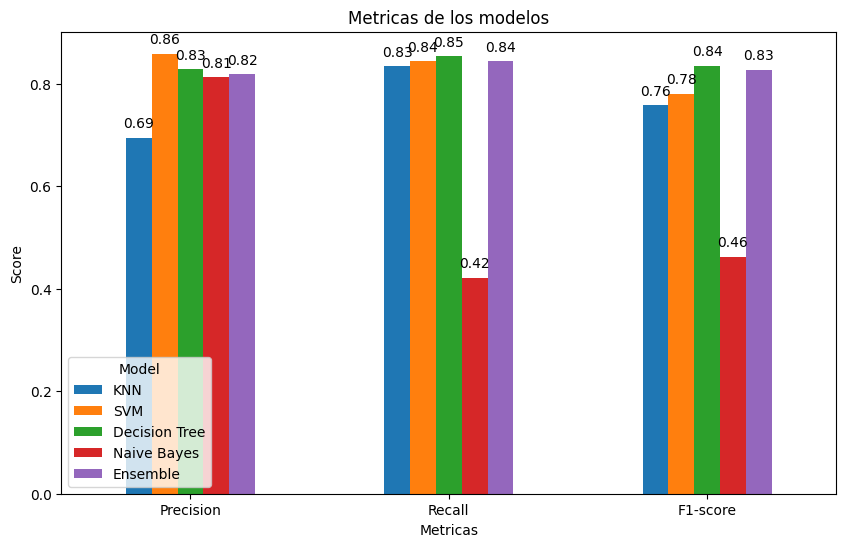

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

# Separar las características (X) y las etiquetas (y)
# Separar las características (X) y la variable objetivo (y)
X = df_gym_limpio.drop(['Level'], axis=1)
y = df_gym_limpio['Level']

# Codificar variables categóricas
X_encoded = pd.get_dummies(X)

# Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenamiento de modelos individuales
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear', C=1)
decision_tree = DecisionTreeClassifier()
naive_bayes = GaussianNB()

knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)

# Evaluamos modelos individuales
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    confusion = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return confusion, precision, recall, f1

confusion_knn, precision_knn, recall_knn, f1_knn = evaluate_model(knn, X_test, y_test)
confusion_svm, precision_svm, recall_svm, f1_svm = evaluate_model(svm, X_test, y_test)
confusion_decision_tree, precision_decision_tree, recall_decision_tree, f1_decision_tree = evaluate_model(decision_tree, X_test, y_test)
confusion_naive_bayes, precision_naive_bayes, recall_naive_bayes, f1_naive_bayes = evaluate_model(naive_bayes, X_test, y_test)

# Resultados de modelos individuales
print("K-Nearest Neighbors:")
print("Confusion Matrix:", confusion_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-score:", f1_knn)

# Ensamblar modelos
ensemble = VotingClassifier(estimators=[('knn', knn), ('svm', svm), ('decision_tree', decision_tree), ('naive_bayes', naive_bayes)], voting='hard')
ensemble.fit(X_train, y_train)

# Evaluar modelo ensamblado
confusion_ensemble, precision_ensemble, recall_ensemble, f1_ensemble = evaluate_model(ensemble, X_test, y_test)

# Resultados del modelo ensamblado
print("Ensemble Model:")
print("Confusion Matrix:", confusion_ensemble)
print("Precision:", precision_ensemble)
print("Recall:", recall_ensemble)
print("F1-score:", f1_ensemble)

# métricas de todos los modelos
metrics = {
    'KNN': [precision_knn, recall_knn, f1_knn],
    'SVM': [precision_svm, recall_svm, f1_svm],
    'Decision Tree': [precision_decision_tree, recall_decision_tree, f1_decision_tree],
    'Naive Bayes': [precision_naive_bayes, recall_naive_bayes, f1_naive_bayes],
    'Ensemble': [precision_ensemble, recall_ensemble, f1_ensemble]
}

# Crear un DataFrame de las métricas
metrics_df = pd.DataFrame(metrics, index=['Precision', 'Recall', 'F1-score'])

# Graficar las métricas
ax = metrics_df.plot(kind='bar', figsize=(10, 6))
plt.xticks(rotation=0)
plt.xlabel('Metricas')
plt.ylabel('Score')
plt.title('Metricas de los modelos')
plt.legend(title='Model', loc='lower left')

# Agregar etiquetas a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()




```
ENCONTRAMOS QUE EL MODELO QUE MEJOR APLICA ES EL SVM

```



# **MATRIZ DE CONFUCION DE LOS MODELOS CREADOS**

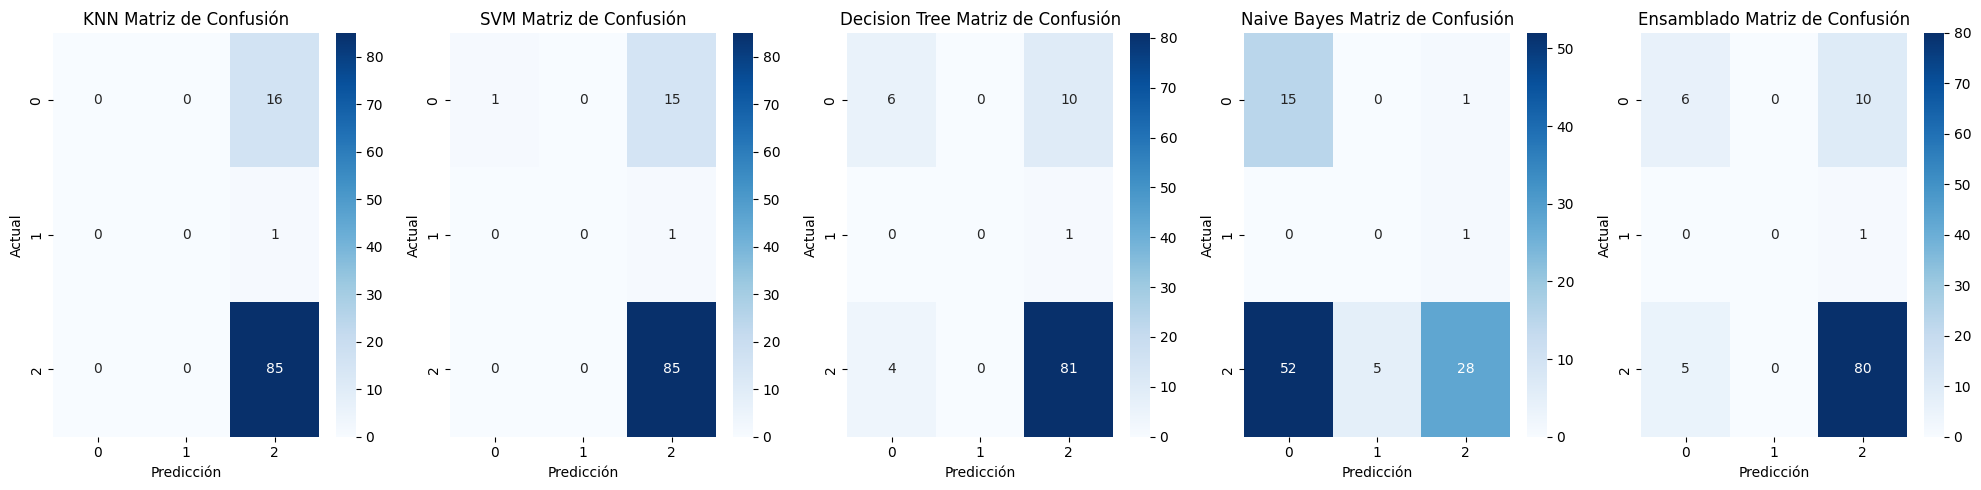

In [29]:
# Función para graficar la matriz de confusión
def plot_confusion_matrix(confusion, title, ax):
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Actual')
    ax.set_title(title)

# Crear una figura con subplots organizados en una fila
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

# Llamas a esta función para cada matriz de confusión
plot_confusion_matrix(confusion_knn, "KNN Matriz de Confusión", ax=axes[0])
plot_confusion_matrix(confusion_svm, "SVM Matriz de Confusión", ax=axes[1])
plot_confusion_matrix(confusion_decision_tree, "Decision Tree Matriz de Confusión", ax=axes[2])
plot_confusion_matrix(confusion_naive_bayes, "Naive Bayes Matriz de Confusión", ax=axes[3])
plot_confusion_matrix(confusion_ensemble, "Ensamblado Matriz de Confusión", ax=axes[4])

plt.tight_layout()
plt.show()



```
# EN EL CONJUNTO DE DATOS HAY POCA MUESTRA DEL LEVEL DE EXPERT, POR ESO SE VE QUE LE CUESTA MAS ESPECIFICAR. PERO EN LINEAS GENERALES REFLEJA EL MODELO
```



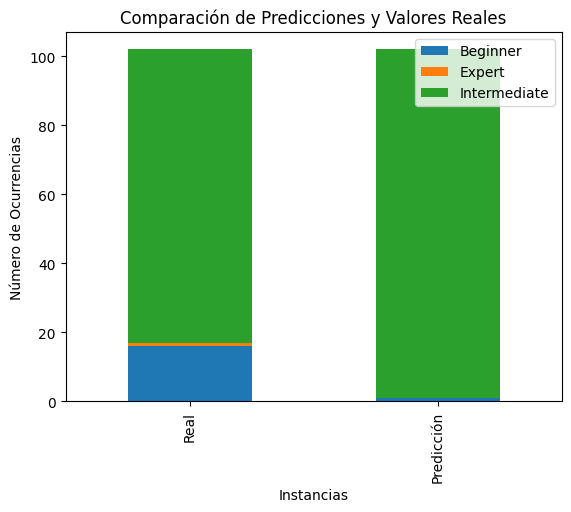

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = svm.predict(X_test)
# Crear un DataFrame con las predicciones y los valores reales
df_results = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})

# Contar las ocurrencias de cada clase
df_plot = df_results.apply(pd.value_counts).fillna(0).transpose()

# Graficar
df_plot.plot(kind='bar', stacked=True)
plt.title('Comparación de Predicciones y Valores Reales')
plt.xlabel('Instancias')
plt.ylabel('Número de Ocurrencias')
plt.show()